In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
train_df = pd.read_csv('../Data/California_house/train.csv')
test_df = pd.read_csv('../Data/California_house/test.csv')

In [2]:
df = train_df
df.head()
df_x = ["MSSubClass","MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","Heating","HeatingQC","CentralAir","Electrical","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond","PavedDrive","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature","MiscVal","MoSold","YrSold","SaleType","SaleCondition","SalePrice"]

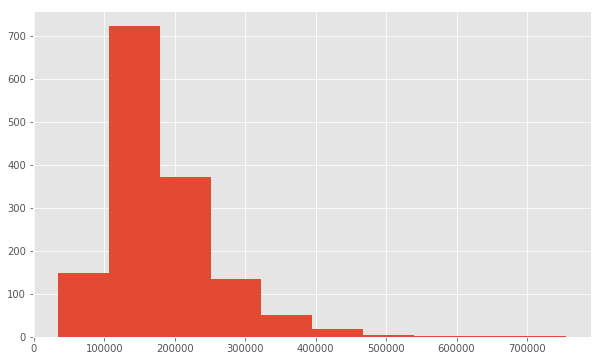

In [3]:
plt.hist(df.SalePrice)
plt.show()

In [4]:
df = train_df
for x in df_x:
    if (df[x].dtype == 'float64' or df[x].dtype == 'int64'):
        df = df.drop(x,axis=1)
    elif (df[x].nunique() > 8):
        df = df.drop(x,axis=1)
df.head()

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleCondition
0,1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,Normal
1,2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,Normal
2,3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,Normal
3,4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,...,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,Abnorml
4,5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,Normal


In [5]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df.drop(column_name,axis=1)
    return df

In [6]:
for col in df.columns:
    if col != 'Id':
        df = create_dummies(df,col).drop(col,axis=1)
df.head()

,Id,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df = pd.concat([train_df.select_dtypes(np.number),df],axis=1)
corr = df.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, dtype: float64


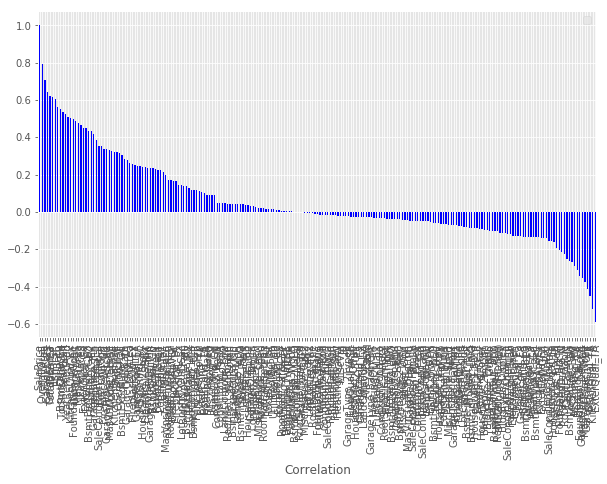

In [8]:
corr_SalePrice = corr.SalePrice.sort_values(ascending=False)
corr_SalePrice.plot(kind='bar', color='blue')
plt.xlabel('Correlation')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

In [9]:
list_of_important_features = []
important_corr = corr['SalePrice']>0.4
for i in important_corr.index:
    list_of_important_features.append(i)
list_of_important_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Id',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',

In [10]:
for (col_name,col_data) in df.iteritems():
    if not(col_name in list_of_important_features):
        df = df.drop(col_name,axis=1)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,0,0,0,1,0


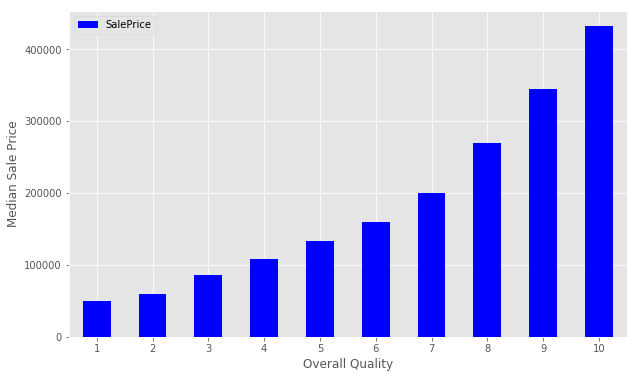

In [11]:
quality_pivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


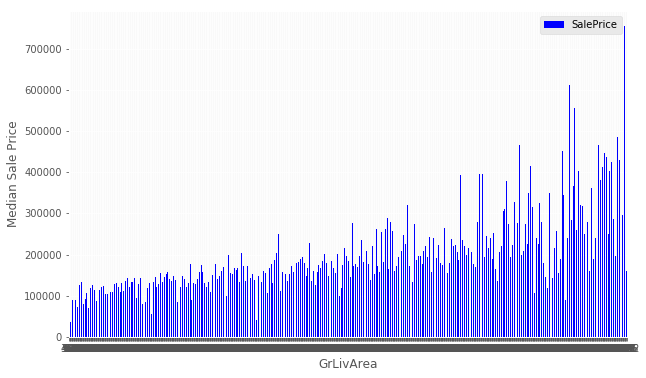

,SalePrice
GrLivArea,
334,39300.0
438,60000.0
480,35311.0
520,68500.0
605,86000.0
...,...
3627,625000.0
4316,755000.0
4476,745000.0


In [12]:
GrLivArea_pivot =  df.pivot_table(index='GrLivArea',
                  values='SalePrice', aggfunc=np.median)
GrLivArea_pivot.plot(kind='bar', color='blue')
plt.xlabel('GrLivArea')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
GrLivArea_pivot

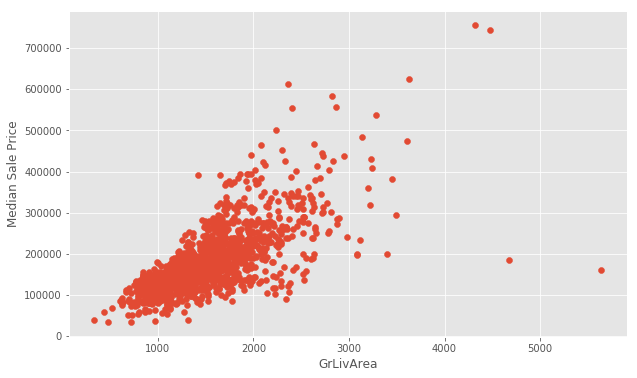

In [13]:
plt.scatter(x=df["GrLivArea"], y=df["SalePrice"])
plt.xlabel('GrLivArea')
plt.ylabel('Median Sale Price')
plt.show()

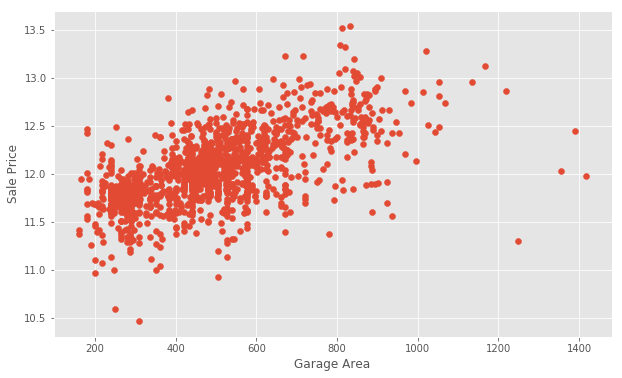

In [14]:
df_garage = df[df.GarageArea > 0]
plt.scatter(x=df_garage['GarageArea'], y=np.log(df_garage.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 217 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(36), uint8(178)
memory usage: 698.8 KB


In [16]:
df.count().head(10)

Id              1460
MSSubClass      1460
LotFrontage     1201
LotArea         1460
OverallQual     1460
OverallCond     1460
YearBuilt       1460
YearRemodAdd    1460
MasVnrArea      1452
BsmtFinSF1      1460
dtype: int64

In [17]:
df.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [18]:
df.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [19]:
df = df.fillna(value=0)
df.count().tail(10)

MiscFeature_Gar2         1460
MiscFeature_Othr         1460
MiscFeature_Shed         1460
MiscFeature_TenC         1460
SaleCondition_Abnorml    1460
SaleCondition_AdjLand    1460
SaleCondition_Alloca     1460
SaleCondition_Family     1460
SaleCondition_Normal     1460
SaleCondition_Partial    1460
dtype: int64

In [20]:
df.to_csv('../Data/California_house/no_nan_id.csv')

In [21]:

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

df = pd.read_csv('../Data/California_house/no_nan_id.csv')
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]
X = df.drop(['SalePrice'],axis=1)
y = df.SalePrice
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

32.41

In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

82.41

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [30]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [32]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [33]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,Y_train)
acc_lasso = round(lasso.score(X_train, Y_train) * 100, 2)
acc_lasso

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227243373647.54688, tolerance: 566931384.728802
  positive)


91.98

In [34]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,Y_train)
acc_ENet = round(ENet.score(X_train, Y_train) * 100, 2)
acc_ENet

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238996187669.85703, tolerance: 566931384.728802
  positive)


91.93

In [35]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,Y_train)
acc_KRR = round(KRR.score(X_train, Y_train) * 100, 2)
acc_KRR

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.12352e-18): result may not be accurate.
  overwrite_a=False)


99.99

In [36]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,Y_train)
acc_GBoost = round(GBoost.score(X_train, Y_train) * 100, 2)
acc_GBoost

96.79

In [37]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
predictions = gbm.predict(X_test)
predictedLabels = (predictions>0.35).astype(int)
print ("\naccuracy_score :",accuracy_score(Y_test,predictedLabels))
print ("\nclassification report :\n",(classification_report(Y_test,predictedLabels)))

[1]	valid_0's l2: 6.83443e+09	valid_0's l1: 57061.2
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 6.36549e+09	valid_0's l1: 54626.9
[3]	valid_0's l2: 5.9173e+09	valid_0's l1: 52267.3
[4]	valid_0's l2: 5.52512e+09	valid_0's l1: 50116.8
[5]	valid_0's l2: 5.15606e+09	valid_0's l1: 47996.2
[6]	valid_0's l2: 4.83869e+09	valid_0's l1: 46119.7
[7]	valid_0's l2: 4.54654e+09	valid_0's l1: 44351.9
[8]	valid_0's l2: 4.28155e+09	valid_0's l1: 42649.7
[9]	valid_0's l2: 4.03772e+09	valid_0's l1: 41071
[10]	valid_0's l2: 3.80053e+09	valid_0's l1: 39490.8
[11]	valid_0's l2: 3.60007e+09	valid_0's l1: 38050.5
[12]	valid_0's l2: 3.41816e+09	valid_0's l1: 36739
[13]	valid_0's l2: 3.24466e+09	valid_0's l1: 35456
[14]	valid_0's l2: 3.07969e+09	valid_0's l1: 34167.8
[15]	valid_0's l2: 2.92831e+09	valid_0's l1: 32971.6
[16]	valid_0's l2: 2.77814e+09	valid_0's l1: 31834.8
[17]	valid_0's l2: 2.65009e+09	valid_0's l1: 30822.3
[18]	valid_0's l2: 2.52226e+09	valid_0's l1: 29829.8
[1

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'Score': [acc_knn, 
              acc_random_forest, acc_gaussian, 
              acc_decision_tree,acc_lasso,acc_ENet,acc_KRR,acc_GBoost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,100.00
3,Decision Tree,100.00
6,KernelRidge,99.99
7,GBoost,96.79
4,Lasso,91.98
5,ENet,91.93
2,Naive Bayes,82.41
0,KNN,32.41


In [62]:
str = "acc_knn,acc_random_forest, acc_gaussian, acc_decision_tree,acc_lasso,acc_ENet,acc_KRR,acc_GBoost"
str = str.replace("acc_","")
print(str.replace(",","_rmse ,"))

knn_rmse ,random_forest_rmse , gaussian_rmse , decision_tree_rmse ,lasso_rmse ,ENet_rmse ,KRR_rmse ,GBoost


In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt  
lasso_rmse = sqrt(mean_squared_error(Y_test,lasso.predict(X_test)))
knn_rmse = sqrt(mean_squared_error(Y_test,knn.predict(X_test)))
random_forest_rmse = sqrt(mean_squared_error(Y_test,random_forest.predict(X_test)))
gaussian_rmse = sqrt(mean_squared_error(Y_test,gaussian.predict(X_test)))
decision_tree_rmse = sqrt(mean_squared_error(Y_test,decision_tree.predict(X_test)))
ENet_rmse = sqrt(mean_squared_error(Y_test,ENet.predict(X_test)))
KRR_rmse = sqrt(mean_squared_error(Y_test,KRR.predict(X_test)))
GBoost_rmse = sqrt(mean_squared_error(Y_test,GBoost.predict(X_test)))

In [64]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'Score': [knn_rmse ,random_forest_rmse , gaussian_rmse , decision_tree_rmse ,lasso_rmse ,ENet_rmse ,KRR_rmse ,GBoost_rmse]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,KernelRidge,155542.850897
0,KNN,71146.392133
3,Decision Tree,61630.353281
2,Naive Bayes,55301.062046
1,Random Forest,46891.698511
4,Lasso,31555.338001
5,ENet,30868.234308
7,GBoost,29416.000586
